In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def gen_DAG(G, src):
    D = nx.DiGraph()
    cur = [src, ]
    visited = set()
    while len(cur) > 0:
        next_tmp = set()
        visited = visited | set(cur)
        for i in cur:
            next_tmp = next_tmp | set(G.neighbors(i))
        next_tmp = next_tmp - visited
        for i in cur:
            nei = G.neighbors(i)
            for n in nei:
                if n in next_tmp:
                    # print("{}->{}".format(i, n))
                    D.add_edge(i, n)
        cur = list(next_tmp)
    return D

In [3]:
def calc_path(G, G_dag, src, recursive=False):
    child = list(G.successors(src))
    if len(child) == 0:
        return 1 / len(G_dag[src])
    sum = 0
    for i in child:
        sum += calc_path(G, G_dag, i, True)
    if recursive:
        return (sum + 1) / len(G_dag[src])
    else:
        return sum

In [4]:
G = nx.Graph()
G.add_nodes_from([i for i in range(1, 11)])
G.add_edges_from([(1, 4), (1, 5), (1, 6), (4, 8), (4, 3), (5, 3), (5, 7), (6, 2), (3, 7), (7, 2), (7, 10), (9, 2)])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

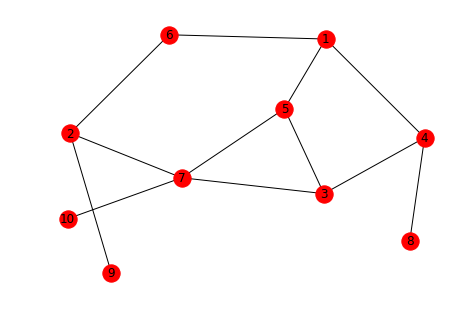

In [5]:
# 网络图
nx.draw(G,with_labels = True)
plt.show()

## Question 1
                             1
                           / | \
                          4  5  6
                        / | /|  |
                       /  |/ |  |
                      8   3--7--2
                             |  |
                            10  9
上图为一个社会网络图的例子。利用GN算法寻找从以下节点开始经过每条边的最短路径的数目

1. 节点1
2. 节点2

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

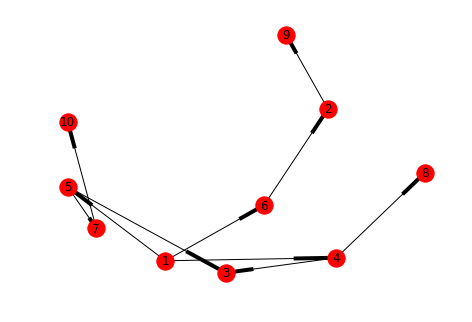

9.0


In [6]:
D1 = gen_DAG(G, 1)
# 处理过的层次网络图，去掉了同层的边，变成了有向图
nx.draw(D1, with_labels=True)
plt.show()

dag = nx.predecessor(D1, 1)
print(calc_path(D1, dag, 1))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

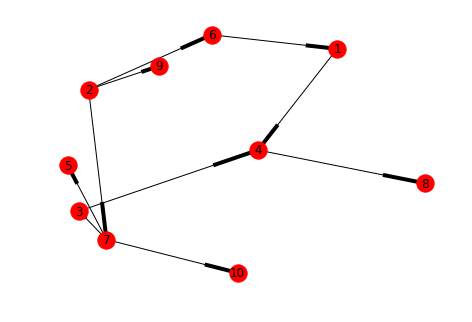

9.0


In [7]:
D2 = gen_DAG(G, 2)
# 处理过的层次网络图，去掉了同层的边，变成了有向图
nx.draw(D2, with_labels=True)
plt.show()

dag = nx.predecessor(D2, 2)
print(calc_path(D2, dag, 2))

## 实验2
对上图

1. 对于节点1和2，他们的邻居描述是什么？
2. 图的直径是多少
3. 图的传递闭包中有多少节点对？如果通过双重递归来计算图的传递闭包，需要多少次循环？

参考链接: [link](https://blog.csdn.net/liveway6/article/details/78352260)

Ans:
1. 
    For Node1：

        N(1,1): {4,5,6}

        N(1,2): {4,5,6,8,3,7,2}

        N(1,3): {4,5,6,8,3,7,2,9,10}

    For Node2：

        N(1,1): {6,7,9}

        N(1,2): {6,7,9,1,7}

        N(1,3): {6,7,9,1,7,5,10,4,3}

        N(1,4): {6,7,9,1,7,5,10,4,3,8}
2. 图的直径为5
3. 图中任意2个点均可达，传递闭包中有90个节点对。需要$O(n^2)$的时间复杂度，这里是100个循环。